 **Exploratory Data Analysis (EDA) involves examining and visualizing data to uncover insights and patterns. Below are 15 EDA questions with corresponding Python code snippets using libraries like pandas, matplotlib, and seaborn to explore our dataset.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('kz.csv')
data.head(2)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18


In [25]:
# Convert 'event_time' to datetime
if 'event_time' in data.columns:
    data['event_time'] = pd.to_datetime(data['event_time'])
else:
    raise KeyError("'event_time' column is not found in the DataFrame")

# Extract features from 'event_time'
data['hour'] = data['event_time'].dt.hour
data['day_of_week'] = data['event_time'].dt.dayofweek

# Aggregate data by user
user_data = data.groupby('user_id').agg({'price': 'sum', 'event_time': 'count'}).reset_index()
user_data.rename(columns={'price': 'total_spend', 'event_time': 'purchase_count'}, inplace=True)

# Merge aggregated data back to the original DataFrame
data = data.merge(user_data, on='user_id')

# Target creation based on total spend
data['target'] = (data['total_spend'] > 100).astype(int)

# Drop columns that won't be used for model training (but keep 'category_code' and 'brand')
drop_columns = ['event_time', 'order_id', 'product_id']
# Check if these columns are in the DataFrame before dropping
existing_drop_columns = [col for col in drop_columns if col in data.columns]
data = data.drop(columns=existing_drop_columns)

# Handle missing values
data['category_code'] = data['category_code'].fillna('unknown')
data['brand'] = data['brand'].fillna('unknown')


1. What are the basic statistics of numerical features?

In [3]:
print(data.describe())

           order_id    product_id   category_id          price       user_id
count  5.097500e+05  5.097500e+05  4.088680e+05  408867.000000  6.313600e+04
mean   2.346834e+18  1.680935e+18  2.273758e+18     130.351745  1.515916e+18
std    7.884104e+15  3.129724e+17  2.389885e+16     214.435889  1.669406e+07
min    2.294360e+18  1.515966e+18  2.268000e+03       0.000000  1.515916e+18
25%    2.348770e+18  1.515966e+18  2.268105e+18      11.550000  1.515916e+18
50%    2.348778e+18  1.515966e+18  2.268105e+18      43.960000  1.515916e+18
75%    2.348788e+18  1.515966e+18  2.268105e+18     162.010000  1.515916e+18
max    2.348797e+18  2.344948e+18  2.374499e+18   18328.680000  1.515916e+18


2. What is the distribution of the target variable?

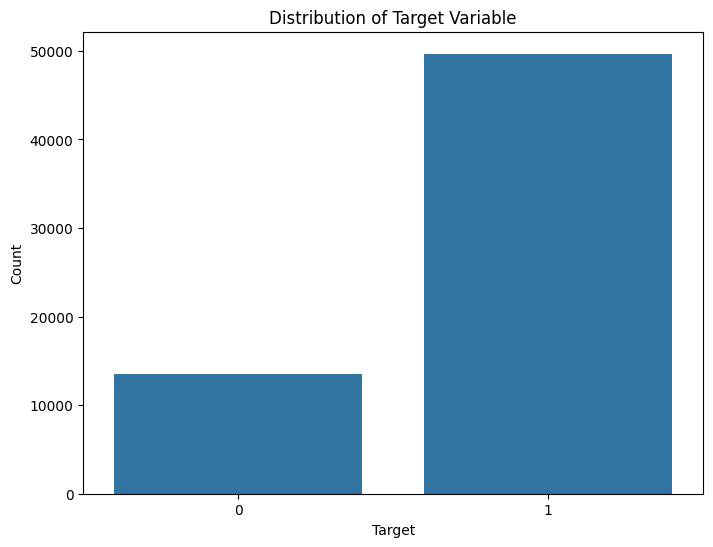

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


3. What is the distribution of total spending?

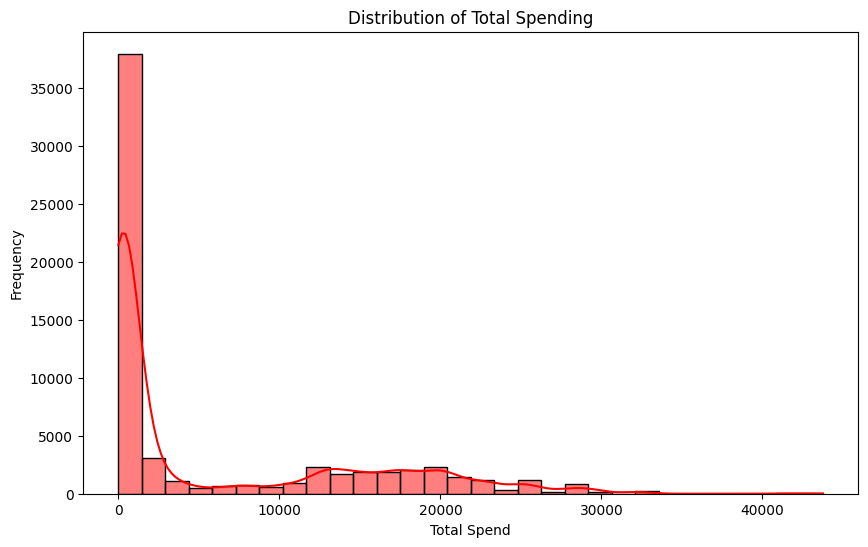

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_spend'], bins=30, kde=True, color = 'r')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()


4. What is the distribution of the number of purchases?

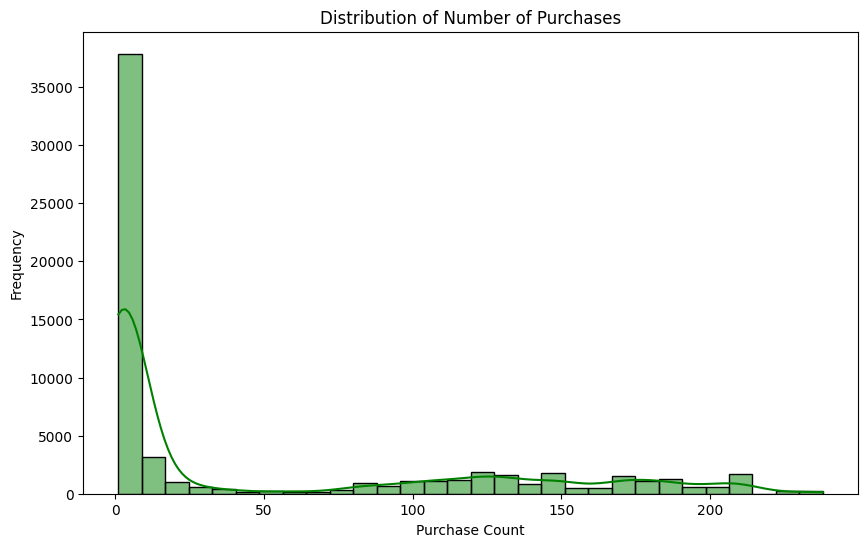

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['purchase_count'], bins=30, kde=True, color = 'g')
plt.title('Distribution of Number of Purchases')
plt.xlabel('Purchase Count')
plt.ylabel('Frequency')
plt.show()


5. How does spending vary by hour of the day?

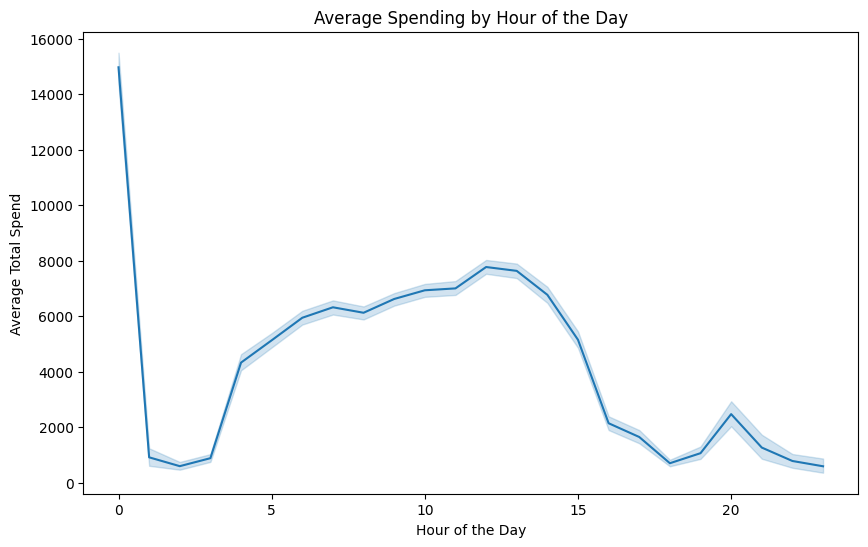

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='total_spend', data=data, estimator='mean')
plt.title('Average Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Spend')
plt.show()


6. How does spending vary by day of the week?

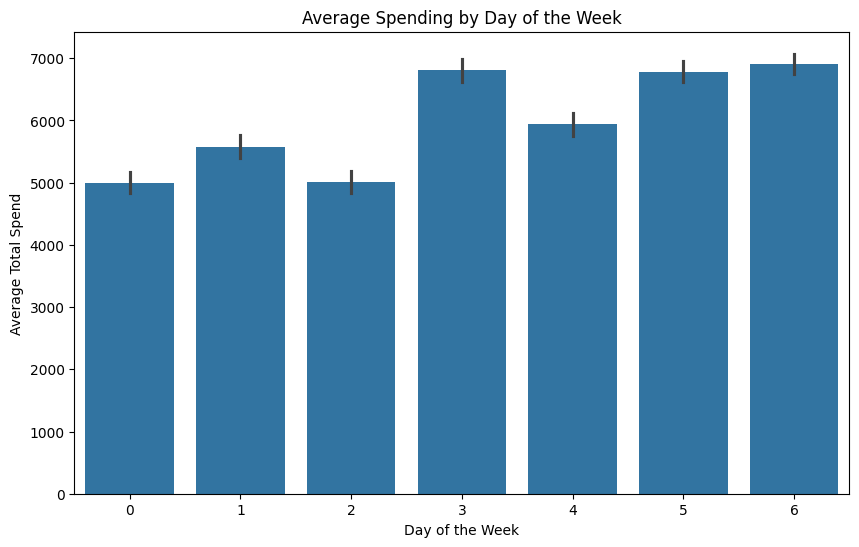

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total_spend', data=data, estimator='mean')
plt.title('Average Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Spend')
plt.show()


7. What are the correlations between numerical features?

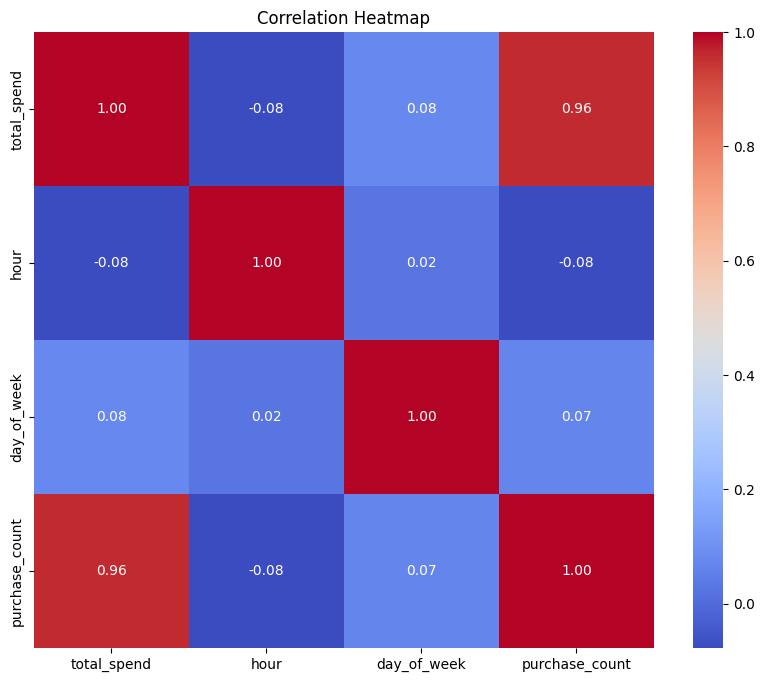

In [13]:
plt.figure(figsize=(10, 8))
corr_matrix = data[['total_spend', 'hour', 'day_of_week', 'purchase_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


8. What are the top categories by spending?

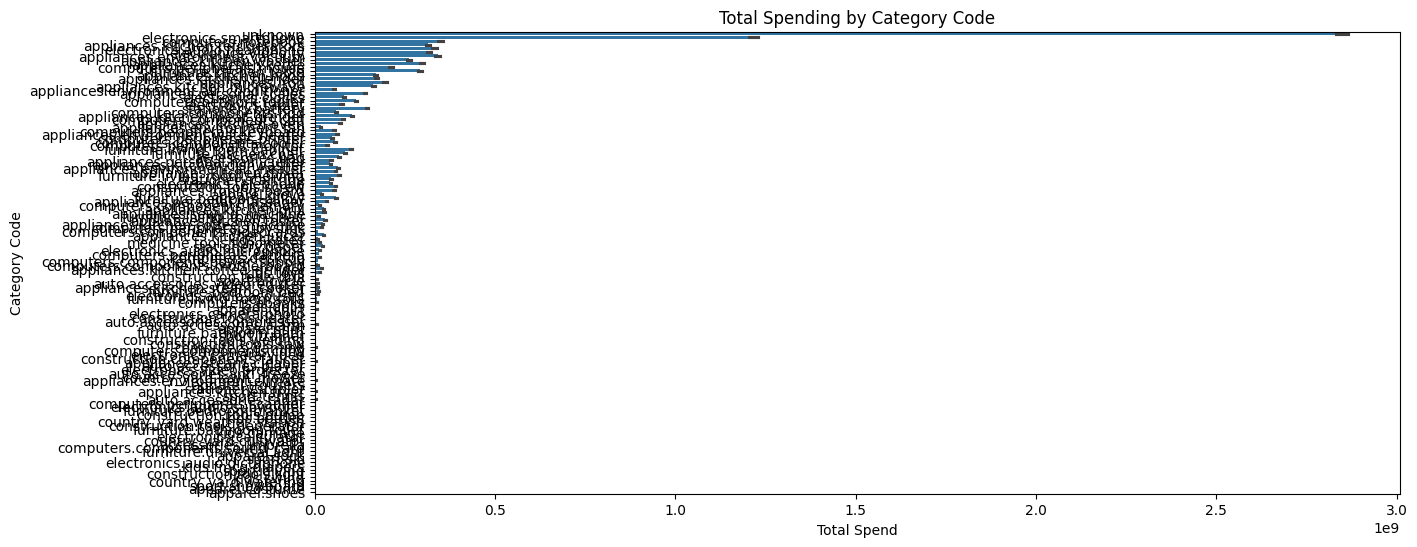

In [26]:
plt.figure(figsize=(14, 6))
sns.barplot(y='category_code', x='total_spend', data=data, estimator='sum', order=data['category_code'].value_counts().index)
plt.title('Total Spending by Category Code')
plt.xlabel('Total Spend')
plt.ylabel('Category Code')
plt.show()


9. What are the top brands by spending?

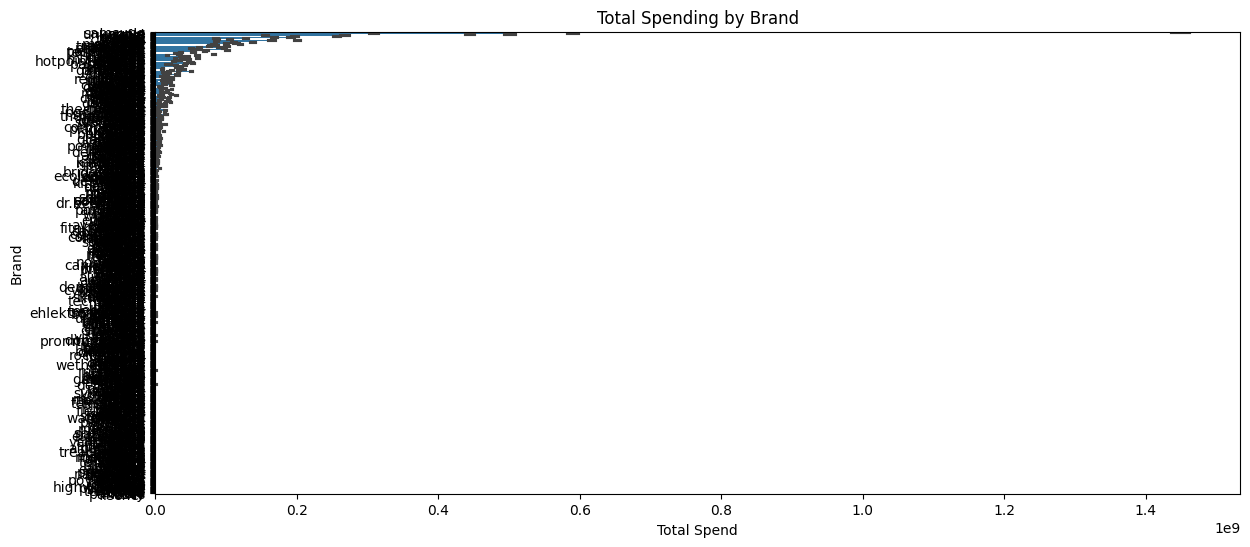

In [27]:
plt.figure(figsize=(14, 6))
sns.barplot(y='brand', x='total_spend', data=data, estimator='sum', order=data['brand'].value_counts().index)
plt.title('Total Spending by Brand')
plt.xlabel('Total Spend')
plt.ylabel('Brand')
plt.show()


10. What is the average spending per user?

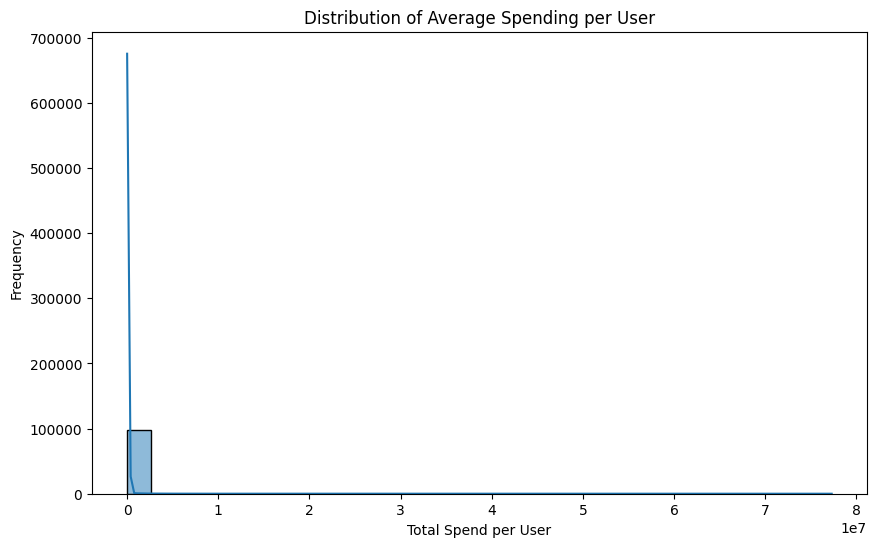

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data.groupby('user_id')['total_spend'].sum(), bins=30, kde=True)
plt.title('Distribution of Average Spending per User')
plt.xlabel('Total Spend per User')
plt.ylabel('Frequency')
plt.show()


11. What is the distribution of spending across different categories?

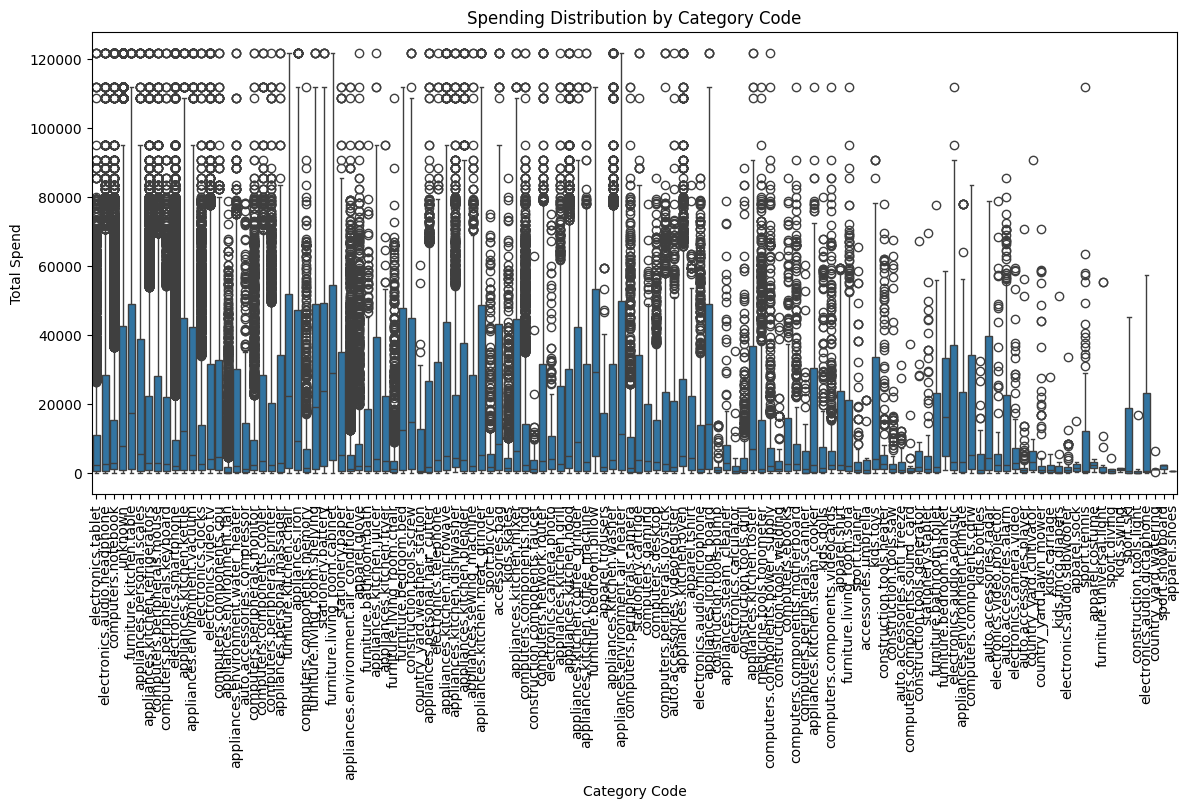

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='category_code', y='total_spend', data=data)
plt.title('Spending Distribution by Category Code')
plt.xlabel('Category Code')
plt.ylabel('Total Spend')
plt.xticks(rotation=90)
plt.show()


12. How does the number of purchases vary by hour of the day?


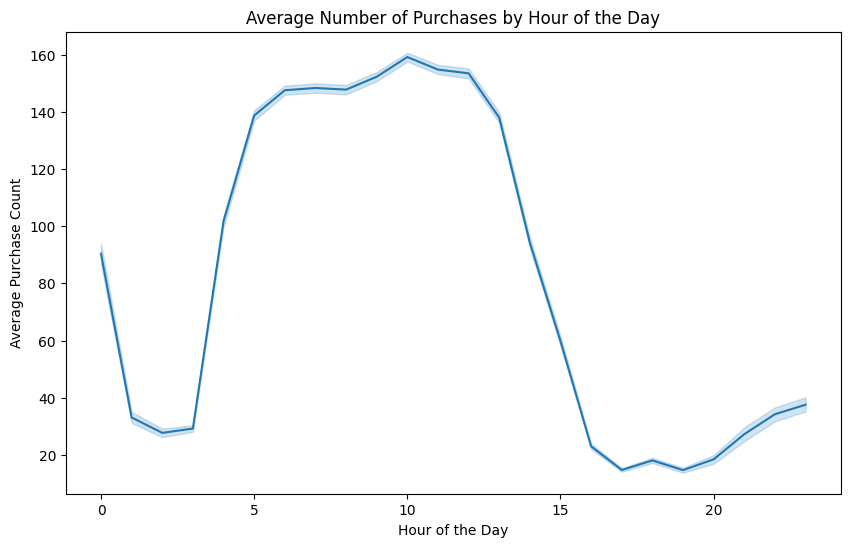

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='purchase_count', data=data, estimator='mean')
plt.title('Average Number of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Purchase Count')
plt.show()


13. How does the number of purchases vary by day of the week?

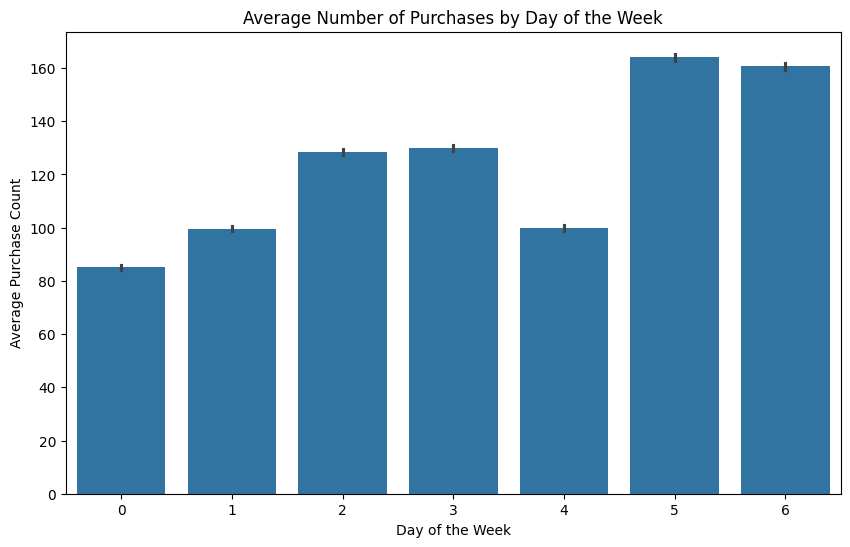

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='purchase_count', data=data, estimator='mean')
plt.title('Average Number of Purchases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Purchase Count')
plt.show()


14. What are the missing values in the dataset?

In [33]:
print(data.isnull().sum())


category_id       0
category_code     0
brand             0
price             0
user_id           0
hour              0
day_of_week       0
total_spend       0
purchase_count    0
target            0
dtype: int64


15. How does spending relate to the number of purchases?

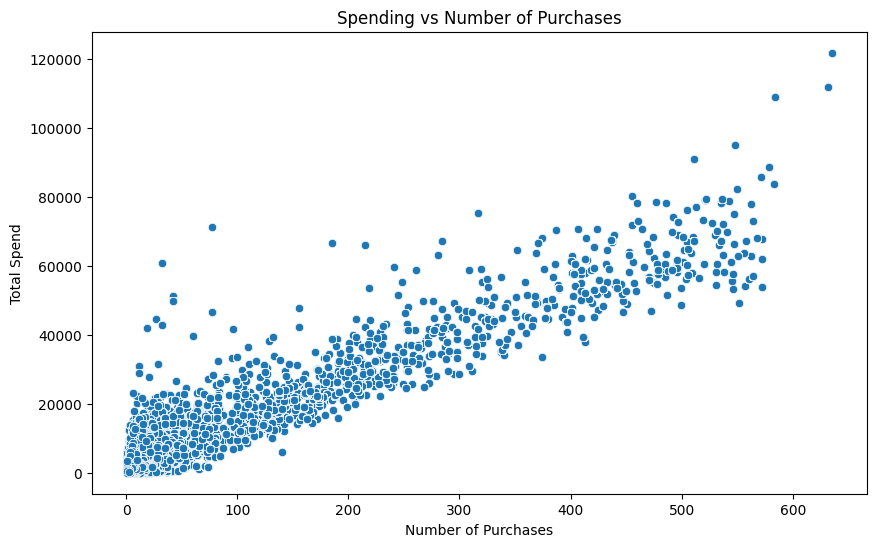

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_count', y='total_spend', data=data)
plt.title('Spending vs Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spend')
plt.show()
